### PyPortfolioOpt

Documentação: https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html

### Otimização - Teoria

Seja $w$ o vetor de pesos das ações e $\mu$ os retornos esperados dessas ações, então o retorno do portfólio é igual ao peso de cada ação multiplicado por seu respectivo retorno, ou seja, $w^T\mu$.

O risco da carteira em termos da matriz de covariância $\Sigma$ é dado por $w^T\Sigma w$

Sendo o retorno alvo $\mu^*$, o problema de otimização do portfólio, considerando apenas posições compradas, pode ser expresso por:

$$
\begin{alignat}{2}
&\!\min_{w}        & \qquad & w^T\Sigma w\\
&\text{sujeito a}  & \qquad & w^T\mu \geq \mu^*\\
&                  & \qquad & w^T \textbf{1} =1 \\
&                  & \qquad & w_i \geq 0 \\
\end{alignat}
$$

### Configuração Inicial

In [1]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 1.3MB 13.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.12-cp37-cp37m-linux_x86_64.whl size=2731645 sha256=d1ca334f8ea1c8f8f06330631cf4e10380b20925d6231d0e7388e0eb53a26ea1
  Stored in directory: /root/.cache/pip/wheels/9b/62/55/1da181c05c710c5d99bd560edebec3bd6a61cb69acef9dc00e
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [2]:
!pip install -q yfinance

     |████████████████████████████████| 6.3MB 12.1MB/s 


In [24]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

from pypfopt import EfficientFrontier, risk_models, expected_returns, objective_functions, plotting
from pypfopt.discrete_allocation import DiscreteAllocation

In [15]:
tickers = ['TRPL4.SA','BBDC4.SA','ITUB4.SA','JHSF3.SA','LEVE3.SA','TAEE3.SA', 'SAPR4.SA','FLRY3.SA']
prices = yf.download(tickers, period='1y')['Adj Close']

[*********************100%***********************]  8 of 8 completed


## 1. Otimização Média-Variância

### Definindo e calculando modelos de Retorno e Risco

| Passado (amostra)| $\Rightarrow$ |Futuro|
|---|---|---|
|Retorno Médio Histórico| $\Rightarrow$ | Retorno Esperado|
|Matriz de Covariância| $\Rightarrow$ | Risco |

In [16]:
# Calcula Retorno Esperado e Matriz de Covariância amostral
mu = expected_returns.mean_historical_return(prices)
S  = risk_models.sample_cov(prices)

### 1.1 Fronteira Eficiente - (Somente posições compradas)

In [17]:
# Calcula a Fronteira Eficiente
ef = EfficientFrontier(mu, S)

#### 1.1.1 Otimizando pelo Máximo Índice de Sharpe

In [18]:
# Otimiza para Máximo Sharpe Ratio
ef.max_sharpe()

OrderedDict([('BBDC4.SA', 0.0),
             ('FLRY3.SA', 0.0),
             ('ITUB4.SA', 0.0),
             ('JHSF3.SA', 0.0725354543868895),
             ('LEVE3.SA', 0.155612329358555),
             ('SAPR4.SA', 0.0),
             ('TAEE3.SA', 0.5342273949881233),
             ('TRPL4.SA', 0.237624821266432)])

In [19]:
ef.clean_weights()

OrderedDict([('BBDC4.SA', 0.0),
             ('FLRY3.SA', 0.0),
             ('ITUB4.SA', 0.0),
             ('JHSF3.SA', 0.07254),
             ('LEVE3.SA', 0.15561),
             ('SAPR4.SA', 0.0),
             ('TAEE3.SA', 0.53423),
             ('TRPL4.SA', 0.23762)])

In [20]:
ef.portfolio_performance(verbose=True);

Expected annual return: 68.8%
Annual volatility: 19.7%
Sharpe Ratio: 3.39


#### 1.1.2 Otimizando pela Mínima Volatilidade

In [25]:
# Otimiza para Mínima Volatilidade
ef.min_volatility()

OptimizationError: ignored

In [26]:
ef.clean_weights()

OrderedDict([('BBDC4.SA', 0.0),
             ('FLRY3.SA', 0.0),
             ('ITUB4.SA', 0.0),
             ('JHSF3.SA', 0.07254),
             ('LEVE3.SA', 0.15561),
             ('SAPR4.SA', 0.0),
             ('TAEE3.SA', 0.53423),
             ('TRPL4.SA', 0.23762)])

In [27]:
ef.portfolio_performance(verbose=True);

Expected annual return: 68.8%
Annual volatility: 19.7%
Sharpe Ratio: 3.39


### 1.2 Fronteira Eficiente - Considerando posições vendidas (short) 

In [28]:
# Calcula a Fronteira Eficiente
ef = EfficientFrontier(mu, S, weight_bounds=(-1,1))

#### 1.2.1 Otimizando pelo Máximo Índice de Sharpe

In [29]:
# Otimiza para Máximo Sharpe Ratio
ef.max_sharpe()

OrderedDict([('BBDC4.SA', 0.372328057977458),
             ('FLRY3.SA', -0.0613017341424849),
             ('ITUB4.SA', -0.4682410306798057),
             ('JHSF3.SA', 0.308401263211633),
             ('LEVE3.SA', 0.2579384952821755),
             ('SAPR4.SA', -0.7514397969415134),
             ('TAEE3.SA', 0.7188039614253984),
             ('TRPL4.SA', 0.6235107838671394)])

In [30]:
ef.clean_weights()

OrderedDict([('BBDC4.SA', 0.37233),
             ('FLRY3.SA', -0.0613),
             ('ITUB4.SA', -0.46824),
             ('JHSF3.SA', 0.3084),
             ('LEVE3.SA', 0.25794),
             ('SAPR4.SA', -0.75144),
             ('TAEE3.SA', 0.7188),
             ('TRPL4.SA', 0.62351)])

In [31]:
ef.portfolio_performance(verbose=True);

Expected annual return: 141.0%
Annual volatility: 32.2%
Sharpe Ratio: 4.31


#### 1.2.2 Otimizando pela Mínima Volatilidade

In [32]:
# Otimiza para Mínima Volatilidade
ef.min_volatility()

OrderedDict([('BBDC4.SA', 0.2258446851075688),
             ('FLRY3.SA', 0.0164532496512414),
             ('ITUB4.SA', -0.26729327746984),
             ('JHSF3.SA', 0.1710427048509036),
             ('LEVE3.SA', 0.1489390388351973),
             ('SAPR4.SA', -0.3979379888947896),
             ('TAEE3.SA', 0.6027594060254888),
             ('TRPL4.SA', 0.5001921818942295)])

In [33]:
ef.clean_weights()

OrderedDict([('BBDC4.SA', 0.22584),
             ('FLRY3.SA', 0.01645),
             ('ITUB4.SA', -0.26729),
             ('JHSF3.SA', 0.17104),
             ('LEVE3.SA', 0.14894),
             ('SAPR4.SA', -0.39794),
             ('TAEE3.SA', 0.60276),
             ('TRPL4.SA', 0.50019)])

In [40]:
ef.portfolio_performance(verbose=True);

Expected annual return: 68.8%
Annual volatility: 19.7%
Sharpe Ratio: 3.39


## 2. Alocação Discreta

In [41]:
pesos = ef.min_volatility()

OptimizationError: ignored

In [ ]:
da = DiscreteAllocation(  pesos, prices.iloc[-1], total_portfolio_value=20000, short_ratio=0.5)
allocation, leftover = da.lp_portfolio()
print(allocation)

{'ABEV3.SA': 207, 'EQTL3.SA': 218, 'ITUB4.SA': 70, 'VALE3.SA': 64, 'WEGE3.SA': 32, 'B3SA3.SA': -10, 'BBDC4.SA': -210, 'PETR4.SA': -191}


## 3. Lidando com pesos insignificantes

https://pyportfolioopt.readthedocs.io/en/latest/MeanVariance.html#l2-regularisation

In [42]:
ef = EfficientFrontier(mu, S)

In [43]:
ef.max_sharpe()

OrderedDict([('BBDC4.SA', 0.0),
             ('FLRY3.SA', 0.0),
             ('ITUB4.SA', 0.0),
             ('JHSF3.SA', 0.0725354543868895),
             ('LEVE3.SA', 0.155612329358555),
             ('SAPR4.SA', 0.0),
             ('TAEE3.SA', 0.5342273949881233),
             ('TRPL4.SA', 0.237624821266432)])

In [44]:
ef.portfolio_performance(True)

Expected annual return: 68.8%
Annual volatility: 19.7%
Sharpe Ratio: 3.39


(0.6878092381203965, 0.19673287498720773, 3.3944974278641524)

In [45]:
ef = EfficientFrontier(mu, S)

In [46]:
ef.add_objective(objective_functions.L2_reg, gamma=1)

In [47]:
ef.max_sharpe()

/usr/local/lib/python3.7/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:248: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimization problem so additional objectives may not work as expected."


OrderedDict([('BBDC4.SA', 0.0910870829913192),
             ('FLRY3.SA', 0.0488977006123072),
             ('ITUB4.SA', 0.0507189165470739),
             ('JHSF3.SA', 0.2093488041640896),
             ('LEVE3.SA', 0.2585930579338608),
             ('SAPR4.SA', 0.0),
             ('TAEE3.SA', 0.189147582668197),
             ('TRPL4.SA', 0.1522068550831521)])

In [48]:
ef.portfolio_performance(True)

Expected annual return: 71.2%
Annual volatility: 24.5%
Sharpe Ratio: 2.82


(0.7120510335139127, 0.245253391987296, 2.8217796618680837)

## 4. Gráficos

In [49]:
ef = EfficientFrontier(mu, S)

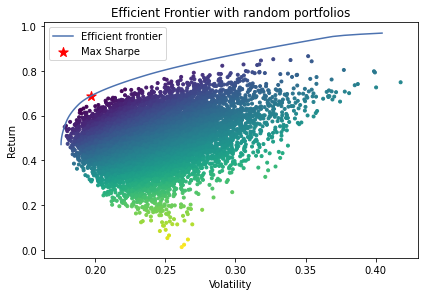

In [50]:
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
#plt.tight_layout()
plt.show()

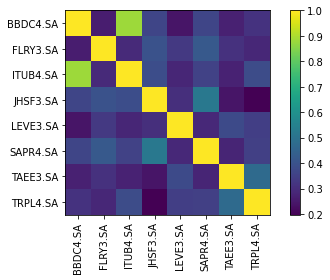

In [51]:
plotting.plot_covariance(S, plot_correlation=True);